# Experiments with the dynamic model

A region contaning one or more contaminated sites.

Each contaminated site is treated as a **task**.

Site may be contaminated by one or more dangerous products.

Every product is assumed to have a **risk** and a **transition rate** attribute.

Products may transform into one another at a **deterministic** rate:

  - A $\rightarrow$ B $\rightarrow$ C


On-site operations (different **duration**):
 - **Neutralize** a *target* product
 - **Remove** *all* products

A task is **completed** if product concentration falls bellow a threshold $\epsilon$.

Minimize the different **objective functions**:
 - Global risk
 - Max risk at any given time
 - Makespan


## Plotting solutions

Instance ../data/instances/stable.dat (global risk =  179.84073, makespan = None)
(1, 8.40) (2, 8.04) (3, 7.72) (4, 7.42) (5, 7.20) (6, 7.01) (7, 6.84) (8, 6.72) (9, 6.49) (10, 6.27) (11, 6.05) (12, 5.89) (13, 5.75) (14, 5.62) (15, 5.54) (16, 5.33) (17, 5.13) (18, 4.93) (19, 4.78) (20, 4.66) (21, 4.54) (22, 4.46) (23, 4.10) (24, 3.78) (25, 3.48) (26, 3.26) (27, 3.07) (28, 2.90) (29, 2.78) (30, 2.55) (31, 2.32) (32, 2.11) (33, 1.95) (34, 1.81) (35, 1.68) (36, 1.59) (37, 1.39) (38, 1.19) (39, 0.99) (40, 0.84) (41, 0.72) (42, 0.60) (43, 0.51) (44, 0.38) (45, 0.27) (46, 0.16) (47, 0.11) (48, 0.09) (49, 0.07) (50, 0.06) (51, 0.05) (52, 0.04) (53, 0.03) (54, 0.03) (55, 0.02) (56, 0.02) (57, 0.02) (58, 0.02) (59, 0.01) (60, 0.01) (61, 0.01) (62, 0.00) (63, 0.00) (64, 0.00) (65, 0.00) (66, 0.00) (67, 0.00) (68, 0.00) (69, 0.00) (70, 0.00) (71, 0.00) (72, 0.00) (73, 0.00) (74, 0.00) (75, 0.00) (76, 0.00) (77, 0.00) (78, 0.00) (79, 0.00) (80, 0.00) (81, 0.00) (82, 0.00) (83, 0.00) (84, 0.00) (85

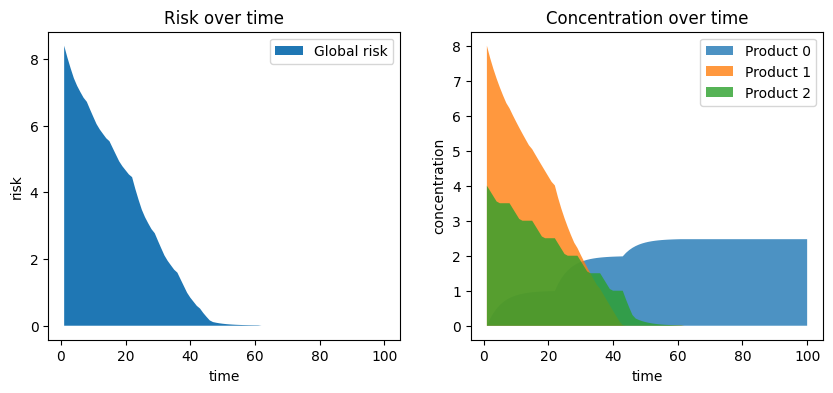

Instance ../data/instances/increasing.dat (global risk =  277.55832, makespan = None)
(1, 7.20) (2, 7.01) (3, 6.82) (4, 6.64) (5, 6.45) (6, 6.37) (7, 6.30) (8, 6.30) (9, 6.09) (10, 5.88) (11, 5.68) (12, 5.47) (13, 5.31) (14, 5.26) (15, 5.24) (16, 5.02) (17, 4.80) (18, 4.58) (19, 4.43) (20, 4.16) (21, 3.92) (22, 3.81) (23, 3.53) (24, 3.26) (25, 3.06) (26, 2.88) (27, 2.72) (28, 2.56) (29, 2.47) (30, 2.44) (31, 2.41) (32, 2.38) (33, 2.36) (34, 2.33) (35, 2.31) (36, 2.29) (37, 2.27) (38, 2.26) (39, 2.25) (40, 2.24) (41, 2.22) (42, 2.21) (43, 2.20) (44, 2.19) (45, 2.17) (46, 2.16) (47, 2.15) (48, 2.13) (49, 2.12) (50, 2.11) (51, 2.09) (52, 2.08) (53, 2.06) (54, 2.05) (55, 2.03) (56, 2.02) (57, 2.00) (58, 1.98) (59, 1.97) (60, 1.95) (61, 1.94) (62, 1.92) (63, 1.91) (64, 1.89) (65, 1.87) (66, 1.86) (67, 1.84) (68, 1.83) (69, 1.81) (70, 1.80) (71, 1.78) (72, 1.77) (73, 1.75) (74, 1.73) (75, 1.72) (76, 1.70) (77, 1.69) (78, 1.67) (79, 1.66) (80, 1.64) (81, 1.63) (82, 1.61) (83, 1.60) (84, 1.58)

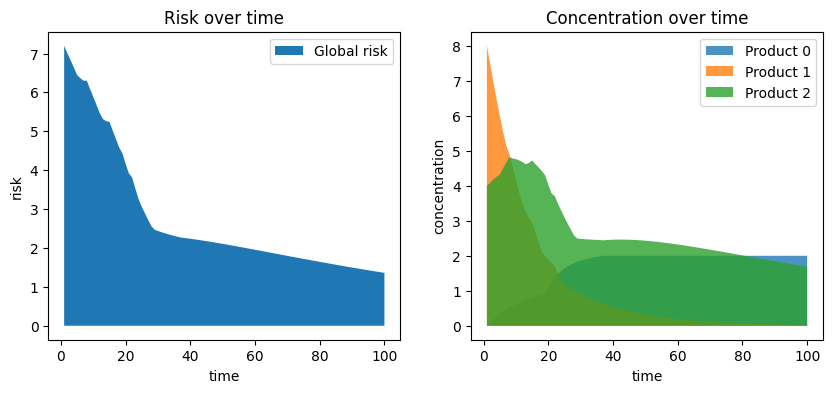

Instance ../data/instances/decreasing.dat (global risk =  147.65730, makespan = None)
(1, 8.40) (2, 7.92) (3, 7.47) (4, 7.05) (5, 6.67) (6, 6.38) (7, 6.16) (8, 6.04) (9, 5.73) (10, 5.43) (11, 5.14) (12, 4.87) (13, 4.71) (14, 4.60) (15, 4.53) (16, 4.28) (17, 4.02) (18, 3.77) (19, 3.64) (20, 3.51) (21, 3.39) (22, 3.34) (23, 3.02) (24, 2.71) (25, 2.51) (26, 2.35) (27, 2.21) (28, 2.07) (29, 1.98) (30, 1.74) (31, 1.55) (32, 1.44) (33, 1.34) (34, 1.23) (35, 1.13) (36, 1.06) (37, 0.85) (38, 0.74) (39, 0.65) (40, 0.56) (41, 0.44) (42, 0.32) (43, 0.25) (44, 0.09) (45, 0.07) (46, 0.06) (47, 0.05) (48, 0.04) (49, 0.03) (50, 0.02) (51, 0.02) (52, 0.02) (53, 0.01) (54, 0.01) (55, 0.01) (56, 0.01) (57, 0.01) (58, 0.00) (59, 0.00) (60, 0.00) (61, 0.00) (62, 0.00) (63, 0.00) (64, 0.00) (65, 0.00) (66, 0.00) (67, 0.00) (68, 0.00) (69, 0.00) (70, 0.00) (71, 0.00) (72, 0.00) (73, 0.00) (74, 0.00) (75, 0.00) (76, 0.00) (77, 0.00) (78, 0.00) (79, 0.00) (80, 0.00) (81, 0.00) (82, 0.00) (83, 0.00) (84, 0.00)

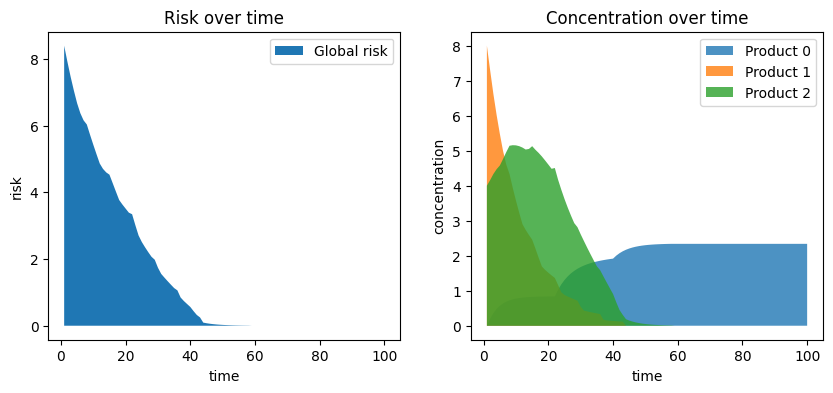

In [1]:
# import sys
# from IPython.utils import io

from optlis.dynamic.notebook_utils import plot_graphs

for instance_name in ("stable", "increasing", "decreasing"):
    plot_graphs(
        f"../data/instances/{instance_name}.dat",
        f"../data/solutions/{instance_name}.sol"
    )

# plot_graphs(
#     f"../data/instances/example-dynamic-single.dat",
#     f"../data/solutions/example-dynamic-single.sol"
# )

Instance ../data/instances/example-dynamic-single.dat (global risk =  19.56743, makespan = None)
(1, 0.79) (2, 0.79) (3, 0.65) (4, 0.54) (5, 0.45) (6, 0.39) (7, 0.33) (8, 0.29) (9, 0.26) (10, 0.24) (11, 0.22) (12, 0.20) (13, 0.19) (14, 0.18) (15, 0.18) (16, 0.17) (17, 0.17) (18, 0.16) (19, 0.16) (20, 0.16) (21, 0.16) (22, 0.16) (23, 0.15) (24, 0.15) (25, 0.15) (26, 0.15) (27, 0.15) (28, 0.15) (29, 0.15) (30, 0.15) (31, 0.15) (32, 0.15) (33, 0.15) (34, 0.15) (35, 0.15) (36, 0.15) (37, 0.15) (38, 0.15) (39, 0.15) (40, 0.15) (41, 0.15) (42, 0.15) (43, 0.15) (44, 0.15) (45, 0.15) (46, 0.15) (47, 0.15) (48, 0.15) (49, 0.15) (50, 0.15) (51, 0.15) (52, 0.15) (53, 0.15) (54, 0.15) (55, 0.15) (56, 0.15) (57, 0.15) (58, 0.15) (59, 0.15) (60, 0.15) (61, 0.15) (62, 0.15) (63, 0.15) (64, 0.15) (65, 0.15) (66, 0.15) (67, 0.15) (68, 0.15) (69, 0.15) (70, 0.15) (71, 0.15) (72, 0.15) (73, 0.15) (74, 0.15) (75, 0.15) (76, 0.15) (77, 0.15) (78, 0.15) (79, 0.15) (80, 0.15) (81, 0.15) (82, 0.15) (83, 0.15)

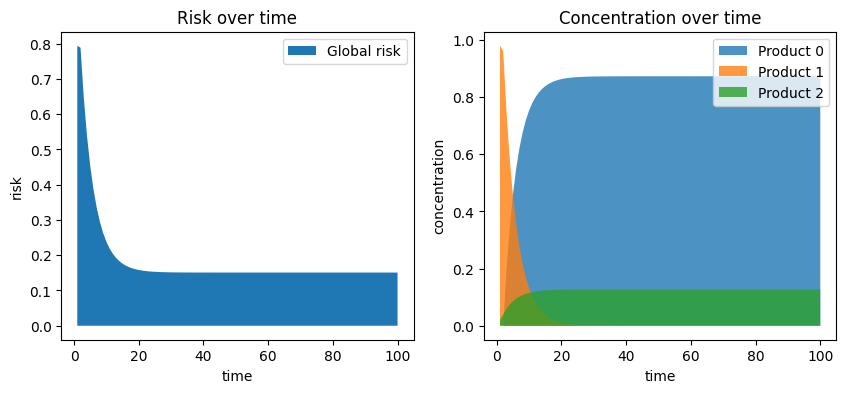

Instance ../data/instances/example-dynamic-double.dat (global risk =  12.09267, makespan = None)
(1, 1.44) (2, 1.30) (3, 1.19) (4, 1.11) (5, 1.03) (6, 0.97) (7, 0.92) (8, 0.88) (9, 0.84) (10, 0.81) (11, 0.00) (12, 0.00) (13, 0.00) (14, 0.00) (15, 0.00) (16, 0.00) (17, 0.00) (18, 0.00) (19, 0.00) (20, 0.00) (21, 0.00) (22, 0.00) (23, 0.00) (24, 0.00) (25, 0.00) (26, 0.00) (27, 0.00) (28, 0.00) (29, 0.00) (30, 0.00) (31, 0.00) (32, 0.00) (33, 0.00) (34, 0.00) (35, 0.00) (36, 0.00) (37, 0.00) (38, 0.00) (39, 0.00) (40, 0.00) (41, 0.00) (42, 0.00) (43, 0.00) (44, 0.00) (45, 0.00) (46, 0.00) (47, 0.00) (48, 0.00) (49, 0.00) (50, 0.00) (51, 0.00) (52, 0.00) (53, 0.00) (54, 0.00) (55, 0.00) (56, 0.00) (57, 0.00) (58, 0.00) (59, 0.00) (60, 0.00) (61, 0.00) (62, 0.00) (63, 0.00) (64, 0.00) (65, 0.00) (66, 0.00) (67, 0.00) (68, 0.00) (69, 0.00) (70, 0.00) (71, 0.00) (72, 0.00) (73, 0.00) (74, 0.00) (75, 0.00) (76, 0.00) (77, 0.00) (78, 0.00) (79, 0.00) (80, 0.00) (81, 0.00) (82, 0.00) (83, 0.00)

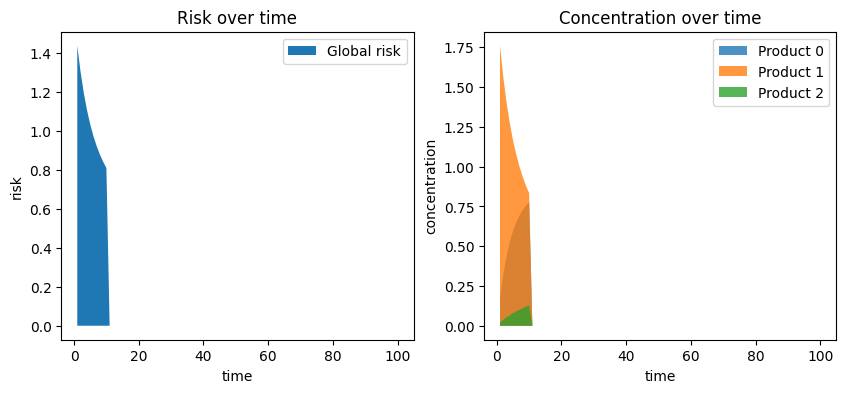

In [2]:
# for n in (8, 16, 32):
#     plot_graphs(
#         f"../output/hx-n{n}-pu-ru-q1.dat",
#         f"../output/hx-n{n}-pu-ru-q1.sol"
#     )

plot_graphs(
    f"../data/instances/example-dynamic-single.dat",
    f"../data/solutions/example-dynamic-single.sol"
)

plot_graphs(
    f"../data/instances/example-dynamic-double.dat",
    f"../data/solutions/example-dynamic-double.sol"
)

Instance ../.experiments/vm/dynamic/instances/zero/hx-n32-pu-ru-q2.dat (global risk =  747.96427, makespan = None)
(1, 8.99) (2, 8.85) (3, 8.71) (4, 8.57) (5, 8.43) (6, 8.30) (7, 8.17) (8, 8.04) (9, 7.91) (10, 7.79) (11, 7.69) (12, 7.59) (13, 7.47) (14, 7.35) (15, 7.25) (16, 7.16) (17, 7.07) (18, 6.98) (19, 6.89) (20, 6.83) (21, 6.77) (22, 6.68) (23, 6.60) (24, 6.49) (25, 6.38) (26, 6.27) (27, 6.16) (28, 6.06) (29, 6.01) (30, 5.96) (31, 5.91) (32, 5.85) (33, 5.80) (34, 5.73) (35, 5.63) (36, 5.53) (37, 5.44) (38, 5.34) (39, 5.24) (40, 5.15) (41, 5.08) (42, 5.03) (43, 4.99) (44, 4.95) (45, 4.91) (46, 4.87) (47, 4.83) (48, 4.79) (49, 4.75) (50, 4.72) (51, 4.65) (52, 4.56) (53, 4.48) (54, 4.41) (55, 4.35) (56, 4.29) (57, 4.24) (58, 4.19) (59, 4.15) (60, 4.12) (61, 4.06) (62, 4.01) (63, 3.95) (64, 3.90) (65, 3.87) (66, 3.84) (67, 3.81) (68, 3.78) (69, 3.75) (70, 3.72) (71, 3.69) (72, 3.66) (73, 3.61) (74, 3.55) (75, 3.52) (76, 3.47) (77, 3.44) (78, 3.41) (79, 3.38) (80, 3.36) (81, 3.33) (82

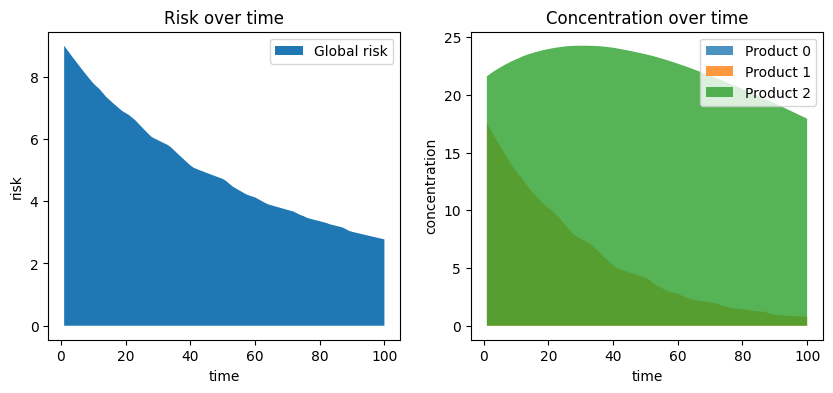

Instance ../.experiments/vm/dynamic/instances/nonzero/hx-n32-pu-ru-q2.dat (global risk =  186.68126, makespan = None)
(1, 8.61) (2, 8.12) (3, 7.66) (4, 7.23) (5, 6.82) (6, 6.43) (7, 6.07) (8, 5.76) (9, 5.49) (10, 5.23) (11, 4.99) (12, 4.74) (13, 4.47) (14, 4.21) (15, 3.96) (16, 3.73) (17, 3.54) (18, 3.38) (19, 3.23) (20, 3.08) (21, 2.94) (22, 2.81) (23, 2.69) (24, 2.57) (25, 2.47) (26, 2.37) (27, 2.27) (28, 2.18) (29, 2.07) (30, 1.99) (31, 1.91) (32, 1.83) (33, 1.75) (34, 1.67) (35, 1.60) (36, 1.54) (37, 1.49) (38, 1.43) (39, 1.36) (40, 1.28) (41, 1.22) (42, 1.16) (43, 1.10) (44, 1.05) (45, 1.01) (46, 0.98) (47, 0.95) (48, 0.92) (49, 0.89) (50, 0.86) (51, 0.83) (52, 0.81) (53, 0.78) (54, 0.74) (55, 0.69) (56, 0.66) (57, 0.63) (58, 0.60) (59, 0.57) (60, 0.55) (61, 0.53) (62, 0.50) (63, 0.49) (64, 0.47) (65, 0.46) (66, 0.44) (67, 0.43) (68, 0.42) (69, 0.40) (70, 0.39) (71, 0.37) (72, 0.35) (73, 0.33) (74, 0.32) (75, 0.31) (76, 0.29) (77, 0.28) (78, 0.27) (79, 0.26) (80, 0.26) (81, 0.25) 

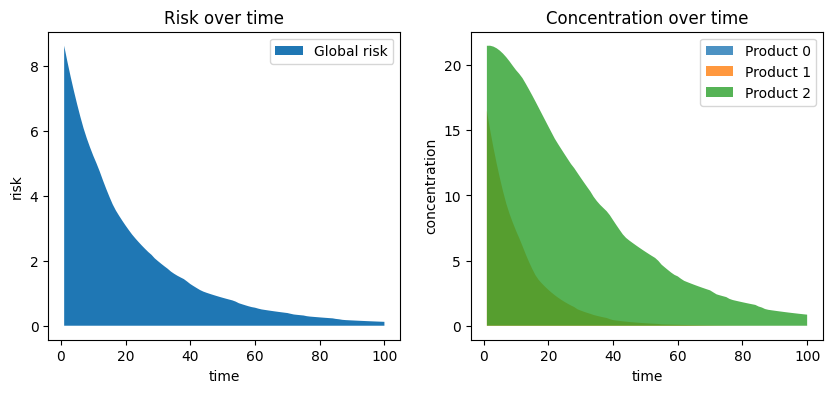

In [3]:
# for n in (8, 16, 32):
#     plot_graphs(
#         f"../output/hx-n{n}-pu-ru-q1.dat",
#         f"../output/hx-n{n}-pu-ru-q1.sol"
#     )

plot_graphs(
    f"../.experiments/vm/dynamic/instances/zero/hx-n32-pu-ru-q2.dat",
    f"../.experiments/vm/dynamic/cplex/zero/sol/hx-n32-pu-ru-q2.sol"
)

plot_graphs(
    f"../.experiments/vm/dynamic/instances/nonzero/hx-n32-pu-ru-q2.dat",
    f"../.experiments/vm/dynamic/cplex/nonzero/sol/hx-n32-pu-ru-q2.sol"
)
